In [1]:
pip install GoogleNews

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.8/293.8 kB 4.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
from GoogleNews import GoogleNews
import time
import concurrent.futures
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def search_and_collect_articles(page_number, df, unique_article_titles, googlenews):
    try:
        googlenews.search('crypto')
        googlenews.get_page(page_number)
        result = googlenews.results()

        if not result:
            return df, 0

        new_articles_count = 0

        for article in result:
            title = article['title']
            if title not in unique_article_titles:
                df = df.append(article, ignore_index=True)
                unique_article_titles.add(title)
                new_articles_count += 1

        if new_articles_count > 0:
            print(f"Page {page_number}: Found {new_articles_count} new articles. Total unique articles: {len(unique_article_titles)}")

        return df, new_articles_count

    except Exception as e:
        print(f"Page {page_number}: Error - {str(e)}")
        return df, 0

df = pd.DataFrame()
unique_article_titles = set()
max_pages_to_search = 500  # Adjust the maximum number of pages to search

consecutive_empty_pages = 0
page_number = 1
googlenews = GoogleNews(start='01/01/2022', end='29/09/2023')
request_delay = 1  # Reduce the request delay to avoid rate limiting

with concurrent.futures.ThreadPoolExecutor() as executor:
    while page_number <= max_pages_to_search:
        df, new_articles_count = search_and_collect_articles(page_number, df, unique_article_titles, googlenews)
        page_number += 1

        if new_articles_count == 0:
            consecutive_empty_pages += 1
        else:
            consecutive_empty_pages = 0

        if consecutive_empty_pages >= 10:
            print("Stopping as too many consecutive empty pages.")
            break

        time.sleep(request_delay)

df.to_csv('crypto_articles_max_unique.csv', index=False)


<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

Page 1: Found 10 new articles. Total unique articles: 10


<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

Page 2: Found 9 new articles. Total unique articles: 19


<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

Page 3: Found 10 new articles. Total unique articles: 29


<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

Page 4: Found 10 new articles. Total unique articles: 39


<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

Page 5: Found 10 new articles. Total unique articles: 49


<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

Page 6: Found 10 new articles. Total unique articles: 59


<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

Page 7: Found 9 new articles. Total unique articles: 68


<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

Page 8: Found 10 new articles. Total unique articles: 78


<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

Page 9: Found 10 new articles. Total unique articles: 88


<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

Page 10: Found 10 new articles. Total unique articles: 98


<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

Page 11: Found 10 new articles. Total unique articles: 108


<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

Page 12: Found 10 new articles. Total unique articles: 118


<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

Page 13: Found 10 new articles. Total unique articles: 128


<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

Page 14: Found 10 new articles. Total unique articles: 138


<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

Page 15: Found 10 new articles. Total unique articles: 148


<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

Page 16: Found 10 new articles. Total unique articles: 158


<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

Page 17: Found 11 new articles. Total unique articles: 169


<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

Page 18: Found 10 new articles. Total unique articles: 179


<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

Page 19: Found 10 new articles. Total unique articles: 189


<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

Page 20: Found 10 new articles. Total unique articles: 199


<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

Page 21: Found 10 new articles. Total unique articles: 209


<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

Page 22: Found 10 new articles. Total unique articles: 219


<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

Page 23: Found 10 new articles. Total unique articles: 229


<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

Page 24: Found 10 new articles. Total unique articles: 239


<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

Page 25: Found 10 new articles. Total unique articles: 249


<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

Page 26: Found 10 new articles. Total unique articles: 259


<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

Page 27: Found 10 new articles. Total unique articles: 269


<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

Page 28: Found 10 new articles. Total unique articles: 279


<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

Page 29: Found 10 new articles. Total unique articles: 289


<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
<ipython-input-3-050ffcfc991f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

Page 30: Found 9 new articles. Total unique articles: 298
Stopping as too many consecutive empty pages.


In [4]:
df.head()

,title,media,date,datetime,desc,link,img
0,Gambling and crypto lobbyists pay £3k to sit a...,The Guardian,6 mins ago,2023-10-03 17:44:43.105839,,https://www.theguardian.com/politics/2023/oct/...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
1,Expect crypto bankruptcy revelations as Sam Ba...,TheStreet,2 mins ago,2023-10-03 17:48:43.113989,,https://www.thestreet.com/cryptocurrency/polic...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
2,Saatchi Gallery Debuts Its First Crypto Art Ex...,nft now,6 mins ago,2023-10-03 17:44:43.118987,,https://nftnow.com/news/saatchi-gallery-debuts...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
3,Jury selection begins in trial of fallen crypt...,AP News,1 mins ago,2023-10-03 17:49:43.124207,,https://apnews.com/article/bankman-fried-crypt...,
4,PayPal's Stablecoin Boosts Crypto Credibility;...,Bitcoinist,0 mins ago,2023-10-03 17:50:43.129057,,https://bitcoinist.com/paypals-stablecoin-boos...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."


In [5]:
df = df.drop(columns=['date', 'img', 'desc'])
df['datetime'] = pd.to_datetime(df['datetime']).dt.date
df = df.rename(columns={'media': 'source'})

In [6]:
df.head(10)

,title,source,datetime,link
0,Gambling and crypto lobbyists pay £3k to sit a...,The Guardian,2023-10-03,https://www.theguardian.com/politics/2023/oct/...
1,Expect crypto bankruptcy revelations as Sam Ba...,TheStreet,2023-10-03,https://www.thestreet.com/cryptocurrency/polic...
2,Saatchi Gallery Debuts Its First Crypto Art Ex...,nft now,2023-10-03,https://nftnow.com/news/saatchi-gallery-debuts...
3,Jury selection begins in trial of fallen crypt...,AP News,2023-10-03,https://apnews.com/article/bankman-fried-crypt...
4,PayPal's Stablecoin Boosts Crypto Credibility;...,Bitcoinist,2023-10-03,https://bitcoinist.com/paypals-stablecoin-boos...
5,Crypto Whales are Buying These Altcoins for Ga...,BeInCrypto,2023-10-03,https://beincrypto.com/crypto-whales-buying-al...
6,"$889,260,000 in Crypto Lost to Hacks, Scams an...",The Daily Hodl,2023-10-03,https://dailyhodl.com/2023/10/03/889260000-in-...
7,Celsius Clients Probe Chris Ferraro on Bankrup...,Bloomberg.com,2023-10-03,https://www.bloomberg.com/news/articles/2023-1...
8,"UniBot (UNIBOT) Falls 0.16%, Underperforms the...",InvestorsObserver,2023-10-03,https://www.investorsobserver.com/news/crypto-...
9,Sam Bankman-Fried goes on trial accused of mul...,The Telegraph,2023-10-03,https://www.telegraph.co.uk/business/2023/10/0...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     298 non-null    object
 1   source    298 non-null    object
 2   datetime  298 non-null    object
 3   link      298 non-null    object
dtypes: object(4)
memory usage: 9.4+ KB


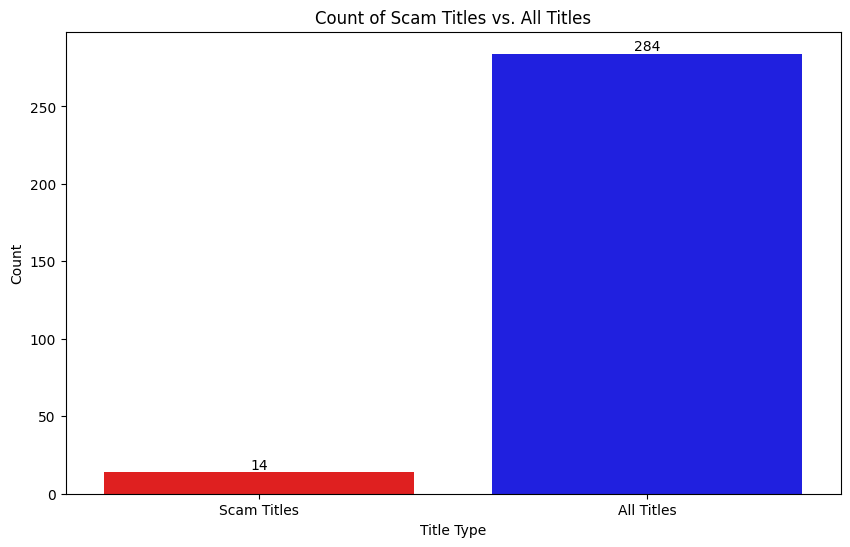

In [9]:
df['type'] = df['title'].str.contains('scam', case=False, na=False)
scam_count = df['type'].sum()
all_titles_count = len(df) - scam_count

count_data = pd.DataFrame({'Count': [scam_count, all_titles_count], 'Type': ['Scam Titles', 'All Titles']})

plt.figure(figsize=(10, 6))
sns.barplot(data=count_data, x='Type', y='Count', palette=['red', 'blue'])

plt.xlabel('Title Type')
plt.ylabel('Count')
plt.title('Count of Scam Titles vs. All Titles')
plt.xticks(rotation=0)

for index, row in count_data.iterrows():
    plt.text(index, row['Count'], str(row['Count']), ha='center', va='bottom')

plt.show()

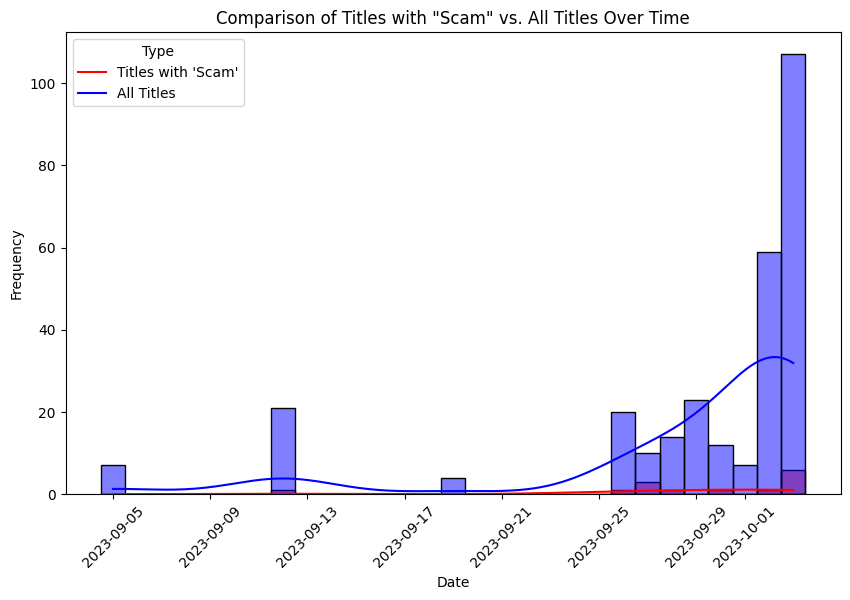

In [10]:
bins = pd.date_range(start=df['datetime'].min(), end=df['datetime'].max(), freq='D')
df['type'] = df['title'].str.contains('scam', case=False, na=False)

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='datetime', bins=bins, hue='type', palette={True: "red", False: "blue"}, kde=True)

plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Comparison of Titles with "Scam" vs. All Titles Over Time')
plt.xticks(rotation=45)
plt.legend(title="Type", labels=["Titles with 'Scam'", "All Titles"], loc='upper left')

plt.show()

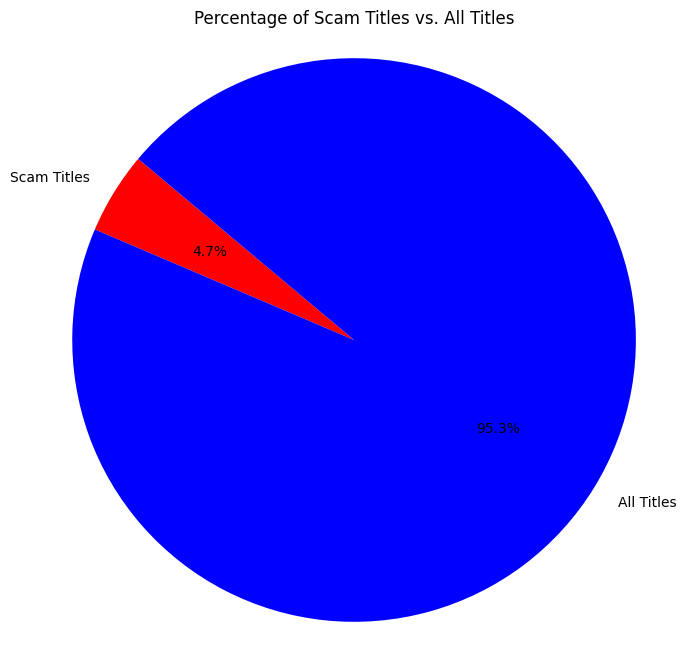

In [11]:
scam_count = df['type'].sum()
all_titles_count = len(df) - scam_count

pie_data = pd.DataFrame({'Count': [scam_count, all_titles_count]}, index=['Scam Titles', 'All Titles'])

plt.figure(figsize=(8, 8))
plt.pie(pie_data['Count'], labels=pie_data.index, autopct='%1.1f%%', colors=['red', 'blue'], startangle=140)
plt.title('Percentage of Scam Titles vs. All Titles')
plt.axis('equal')

plt.show()

In [14]:
df[df['type'] == True].sort_values(by='datetime', ascending=True)

,title,source,datetime,link,type
286,A New Crypto Scam Shows Perils of Elon Musk's ...,CoinDesk,2023-09-12,https://www.coindesk.com/business/2023/09/08/a...,True
246,Chase U.K. to Block Crypto Payments Citing Fra...,CoinDesk,2023-09-26,https://www.coindesk.com/policy/2023/09/26/cha...,True
232,Crypto Scam Led to Demise of Heartland Tri-Sta...,Bloomberg.com,2023-09-27,https://www.bloomberg.com/news/articles/2023-0...,True
240,Chase UK will soon bar its customers from maki...,AP News,2023-09-27,https://apnews.com/article/chase-uk-bans-crypt...,True
241,JPMorgan’s Chase UK bank to block crypto trans...,YouTube,2023-09-27,https://www.youtube.com/watch%3Fv%3DyNusdD36gM...,True
217,Security researcher stopped at US border for i...,Bleeping Computer,2023-09-28,https://www.bleepingcomputer.com/news/security...,True
188,Stearns County Residents Loses Thousands in On...,KNSI,2023-09-30,https://knsiradio.com/2023/09/29/stearns-count...,True
116,Meta fights Andrew Forrest for documents in ba...,The Guardian,2023-10-02,https://www.theguardian.com/australia-news/202...,True
6,"$889,260,000 in Crypto Lost to Hacks, Scams an...",The Daily Hodl,2023-10-03,https://dailyhodl.com/2023/10/03/889260000-in-...,True
17,Investor Beware: Himachal Pradesh's Rs 200 Cro...,The420CyberNews,2023-10-03,https://www.the420.in/cryptocurrency-scam-hima...,True


A Google search for articles containing "scam" within the last 30 days yielded 298 unique articles. Interestingly, only about 2023.09.26 - 2023.10.03 featured discussions involving the term "scam," accounting for merely 4.7% of the total articles.

In [16]:
df.to_csv('articles.csv', index=False)